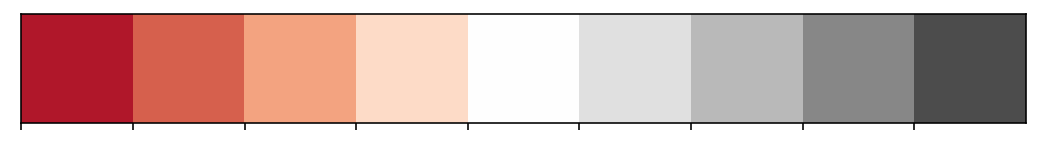

In [1]:
#시작 전 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
import numpy as np
#원하는 한글폰트 지정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #Y축
#경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns


custom_palette = sns.color_palette("RdGy", 9)
sns.palplot(custom_palette)


In [2]:
import pandas as pd
hmr=pd.read_csv('E:/kim_jiwon/src/Project_02/data/최근_1년간_간편식_HMR__품목별_구입경험_및_구입변화_즉석섭취식품__20210416170344.csv',sep=',',encoding='cp949')


In [3]:
#칼럼명 변경
hmr.columns=hmr.iloc[0,:]
#사용하지 않는 칼럼 제거
hmr=hmr.iloc[1:,]

In [4]:
hmr

0  특성별(1)    시점    품목군별(1) 비슷 (%) 약간 증가 (%) 매우 증가 (%)
1      전체  2018        샐러드   55.2      21.6       0.4
2      전체  2018        도시락   56.7      18.5       0.8
3      전체  2018        김밥류   62.7      17.6       0.6
4      전체  2018  샌드위치/햄버거류   56.4      21.3       1.0
5      전체  2018        반찬류   56.8      23.9       1.0
6      전체  2019        샐러드   54.7      15.7       0.5
7      전체  2019        도시락   52.0      13.8       0.6
8      전체  2019        김밥류   61.2      15.9       0.2
9      전체  2019  샌드위치/햄버거류   56.2      19.8       0.3
10     전체  2019        반찬류   53.9      21.4       0.5
11     전체  2020        샐러드   53.1      18.5       1.2
12     전체  2020        도시락   55.6      16.0       0.6
13     전체  2020        김밥류   55.4      21.8       0.9
14     전체  2020  샌드위치/햄버거류   56.5      19.8       1.4
15     전체  2020        반찬류   53.4      24.3       1.6

In [5]:
hmr[['비슷 (%)','약간 증가 (%)','매우 증가 (%)']]

0  비슷 (%) 약간 증가 (%) 매우 증가 (%)
1    55.2      21.6       0.4
2    56.7      18.5       0.8
3    62.7      17.6       0.6
4    56.4      21.3       1.0
5    56.8      23.9       1.0
6    54.7      15.7       0.5
7    52.0      13.8       0.6
8    61.2      15.9       0.2
9    56.2      19.8       0.3
10   53.9      21.4       0.5
11   53.1      18.5       1.2
12   55.6      16.0       0.6
13   55.4      21.8       0.9
14   56.5      19.8       1.4
15   53.4      24.3       1.6

In [6]:
#형변환
hmr[['비슷 (%)','약간 증가 (%)','매우 증가 (%)']]=hmr[['비슷 (%)','약간 증가 (%)','매우 증가 (%)']].astype(float)
hmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 1 to 15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   특성별(1)     15 non-null     object 
 1   시점         15 non-null     object 
 2   품목군별(1)    15 non-null     object 
 3   비슷 (%)     15 non-null     float64
 4   약간 증가 (%)  15 non-null     float64
 5   매우 증가 (%)  15 non-null     float64
dtypes: float64(3), object(3)
memory usage: 852.0+ bytes


In [7]:
hmr["전년 대비 유지 및 증가"]=hmr['비슷 (%)']+hmr['약간 증가 (%)']+hmr['매우 증가 (%)']

In [8]:
hmr

0  특성별(1)    시점    품목군별(1)  비슷 (%)  약간 증가 (%)  매우 증가 (%)  전년 대비 유지 및 증가
1      전체  2018        샐러드    55.2       21.6        0.4           77.2
2      전체  2018        도시락    56.7       18.5        0.8           76.0
3      전체  2018        김밥류    62.7       17.6        0.6           80.9
4      전체  2018  샌드위치/햄버거류    56.4       21.3        1.0           78.7
5      전체  2018        반찬류    56.8       23.9        1.0           81.7
6      전체  2019        샐러드    54.7       15.7        0.5           70.9
7      전체  2019        도시락    52.0       13.8        0.6           66.4
8      전체  2019        김밥류    61.2       15.9        0.2           77.3
9      전체  2019  샌드위치/햄버거류    56.2       19.8        0.3           76.3
10     전체  2019        반찬류    53.9       21.4        0.5           75.8
11     전체  2020        샐러드    53.1       18.5        1.2           72.8
12     전체  2020        도시락    55.6       16.0        0.6           72.2
13     전체  2020        김밥류    55.4       21.8        0.9           78.1
14     전체  2020  샌드위치/햄버거류    56.5       19.8        1.4           77.7
15     전체  2020        반찬류    53.4       24.3        1.6           79.3

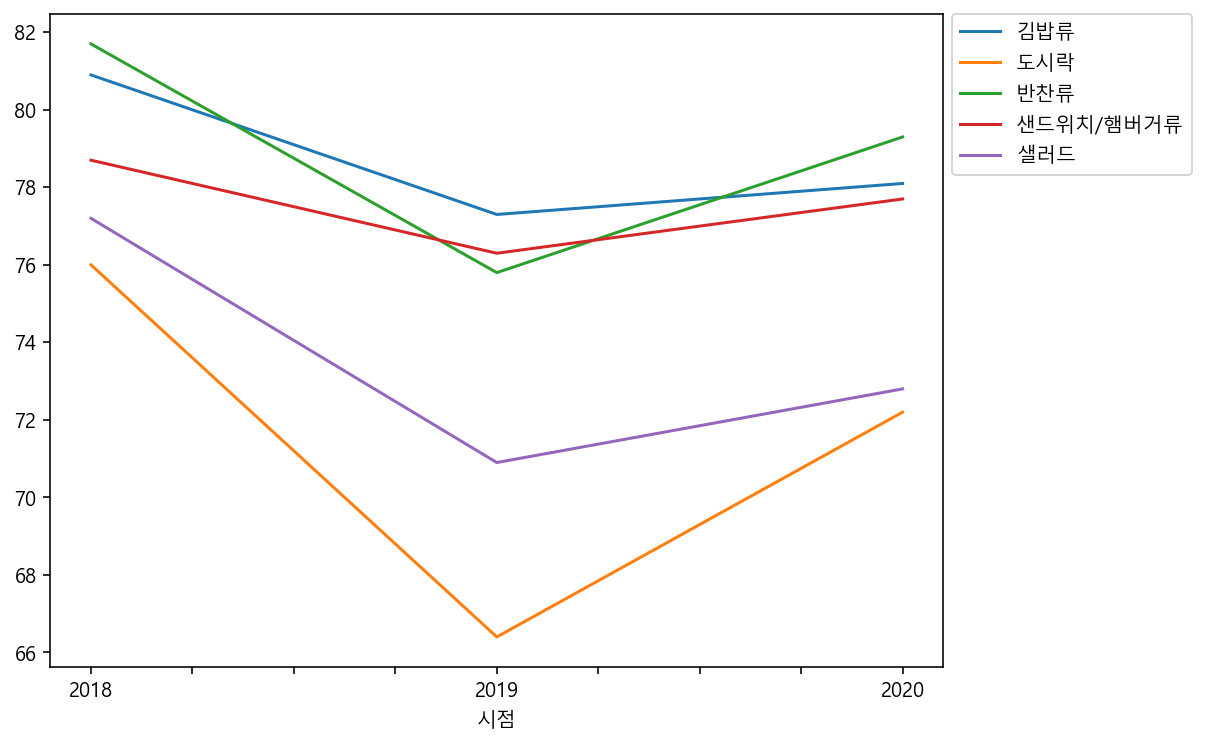

In [11]:
hmr.pivot_table(index='시점',columns='품목군별(1)',values='전년 대비 유지 및 증가').plot(figsize=(8,6))
plt.legend(bbox_to_anchor=(1.01,1),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_02/img/최근_1년간_간편식_HMR__품목별_구입경험_및_구입변화_즉석섭취식품.png')